# Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models

Klara Krmpotić
0036519753


Unos svih potrebnih libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

Ucitavanje podataka i njihov ispis

In [9]:
dataset = pd.read_csv("oasis_longitudinal.csv")

print(dataset)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

Popis stupaca i opis značajki koje imaju numeričke vrijednosti

In [10]:
print(dataset.columns.values)
print()
print(dataset.describe())
print()

['Subject ID' 'MRI ID' 'Group' 'Visit' 'MR Delay' 'M/F' 'Hand' 'Age'
 'EDUC' 'SES' 'MMSE' 'CDR' 'eTIV' 'nWBV' 'ASF']

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286  

Izbacivanje stupca Hand jer za sve primjere je izlaz R  
Izbacivanje stupca Delay jer samo njih 20 ima vrijednost za ostalih 416 vrijednsot nije poznata

In [11]:
dataset.drop(('Hand'), axis=1, inplace=True)
# dataset.drop(('Delay'), axis=1, inplace=True)
print(dataset.isna().sum())
print()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64



### Nedostajući podatci   
Ubaci srednju vrijednost godina tamo gdje nedostaje ta informacija  
Ne izmacivati zapise i znacajke jer su potrebne aa ak se izbace one koje nemaju, maknulo bi se 50 posto podataka  
Uglavnom isti zapis nema sve cetiri vrijednosti tako da bi stvarno otislo skoro 50 posto podataka

In [17]:
dataset_tmp = dataset.copy()

# dataset_tmp.loc[dataset_tmp.Educ.isna(),'Educ'] = dataset_tmp.loc[:,'Educ'].mean()
dataset_tmp.loc[dataset_tmp.SES.isna(),'SES'] = dataset_tmp.loc[:,'SES'].mean().astype(int)
dataset_tmp.loc[dataset_tmp.MMSE.isna(),'MMSE'] = dataset_tmp.loc[:,'MMSE'].mean().astype(int)
# dataset_tmp.loc[dataset_tmp.CDR.isna(),'CDR'] = dataset_tmp.loc[:,'CDR'].mean()
print(dataset_tmp)

dataset_tmp.to_csv('dataset_cleaned.csv')

    Subject ID         MRI ID        Group  Visit  MR Delay M/F  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   87    14   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   88    14   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   75    12   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   76    12   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M   80    12   
..         ...            ...          ...    ...       ...  ..  ...   ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M   82    16   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M   86    16   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F   61    13   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F   63    13   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F   65    13   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.0  27.0  0.0  

### Vizualizacija podataka

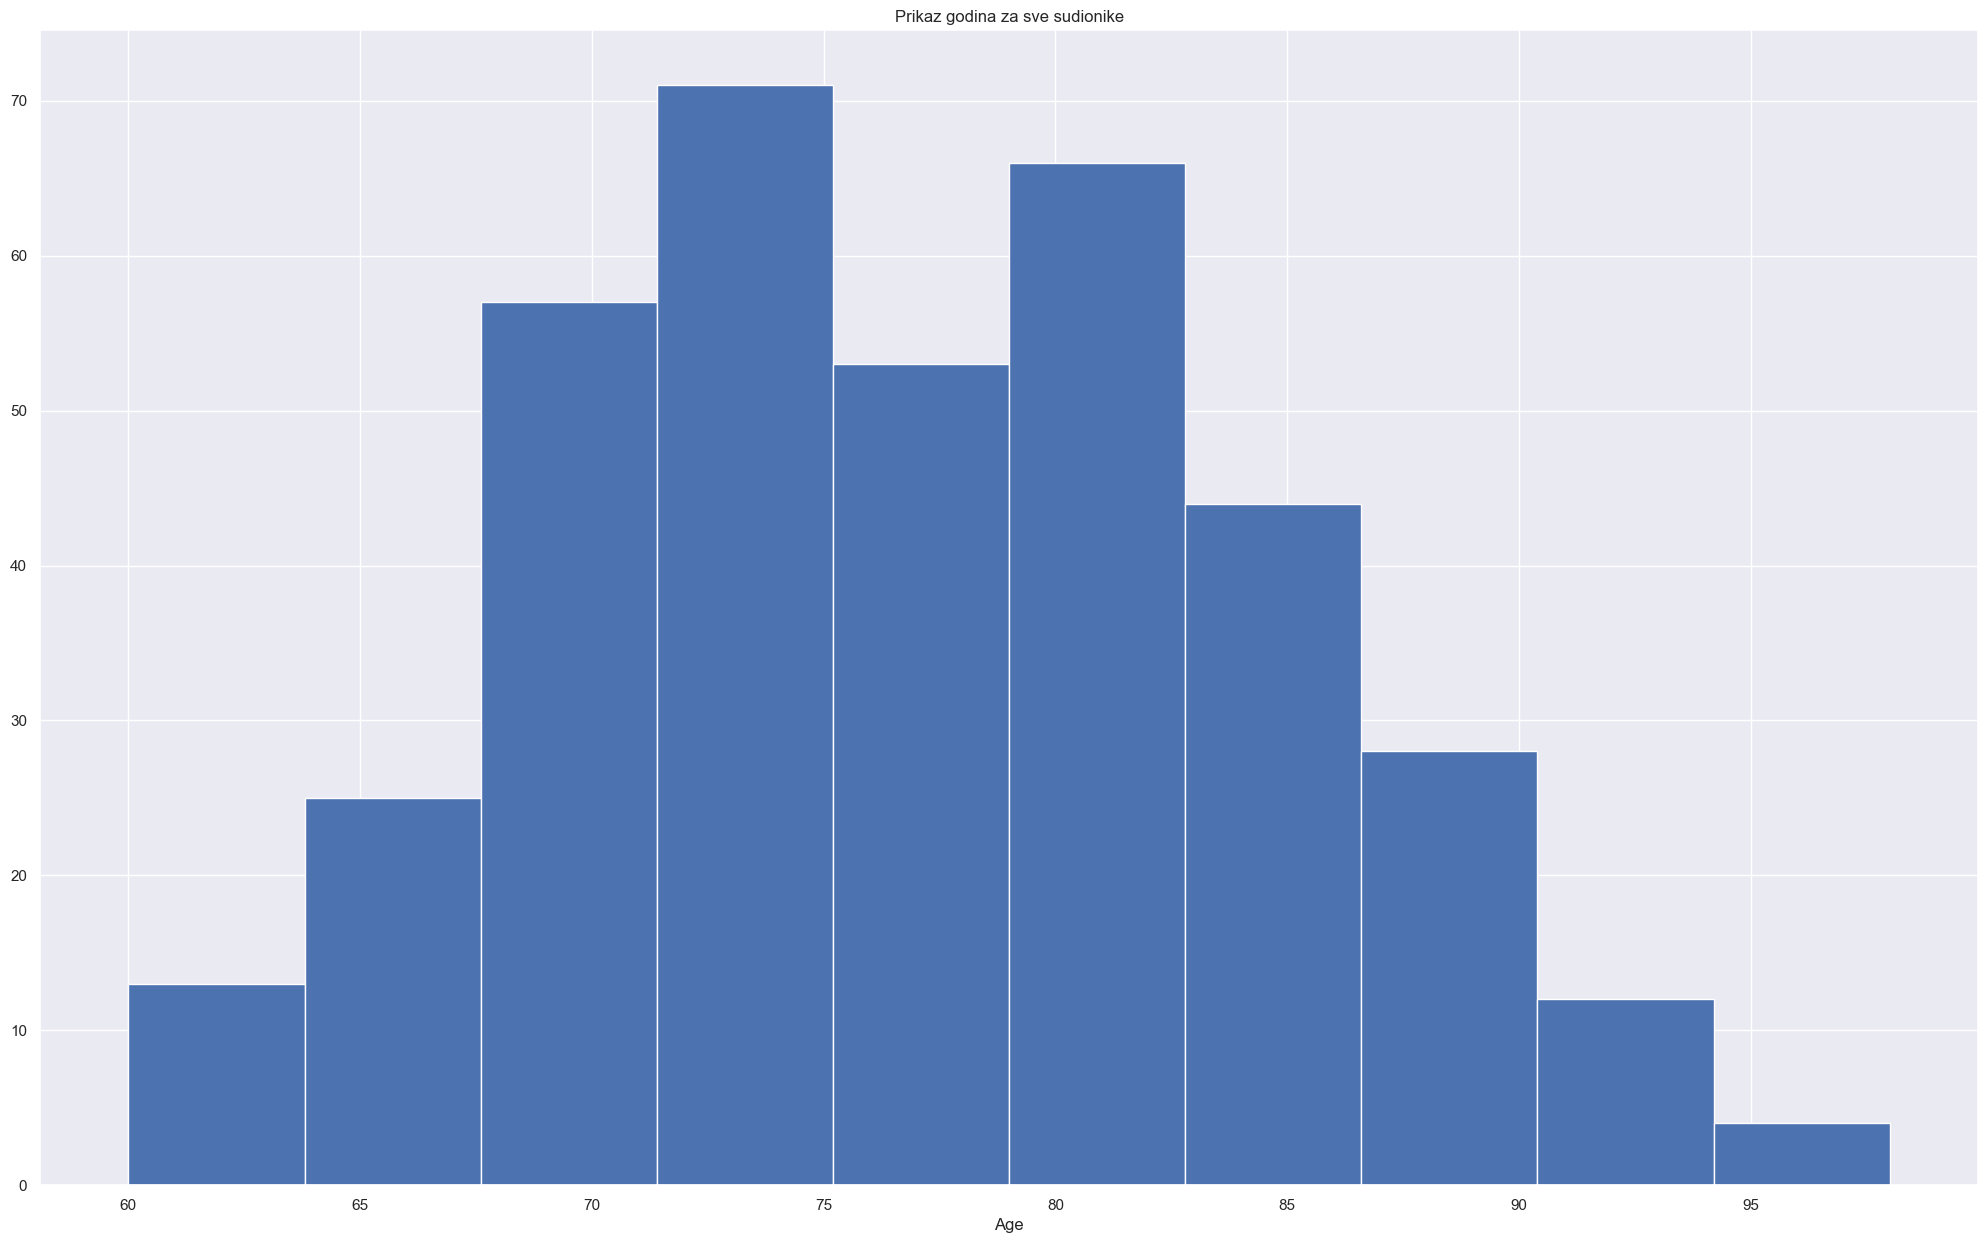

In [19]:
plt.hist(dataset_tmp.Age)
plt.title('Prikaz godina za sve sudionike')
plt.xlabel('Age')
plt.show()
# print(dataset_tmp.sort_values(by='ID'))

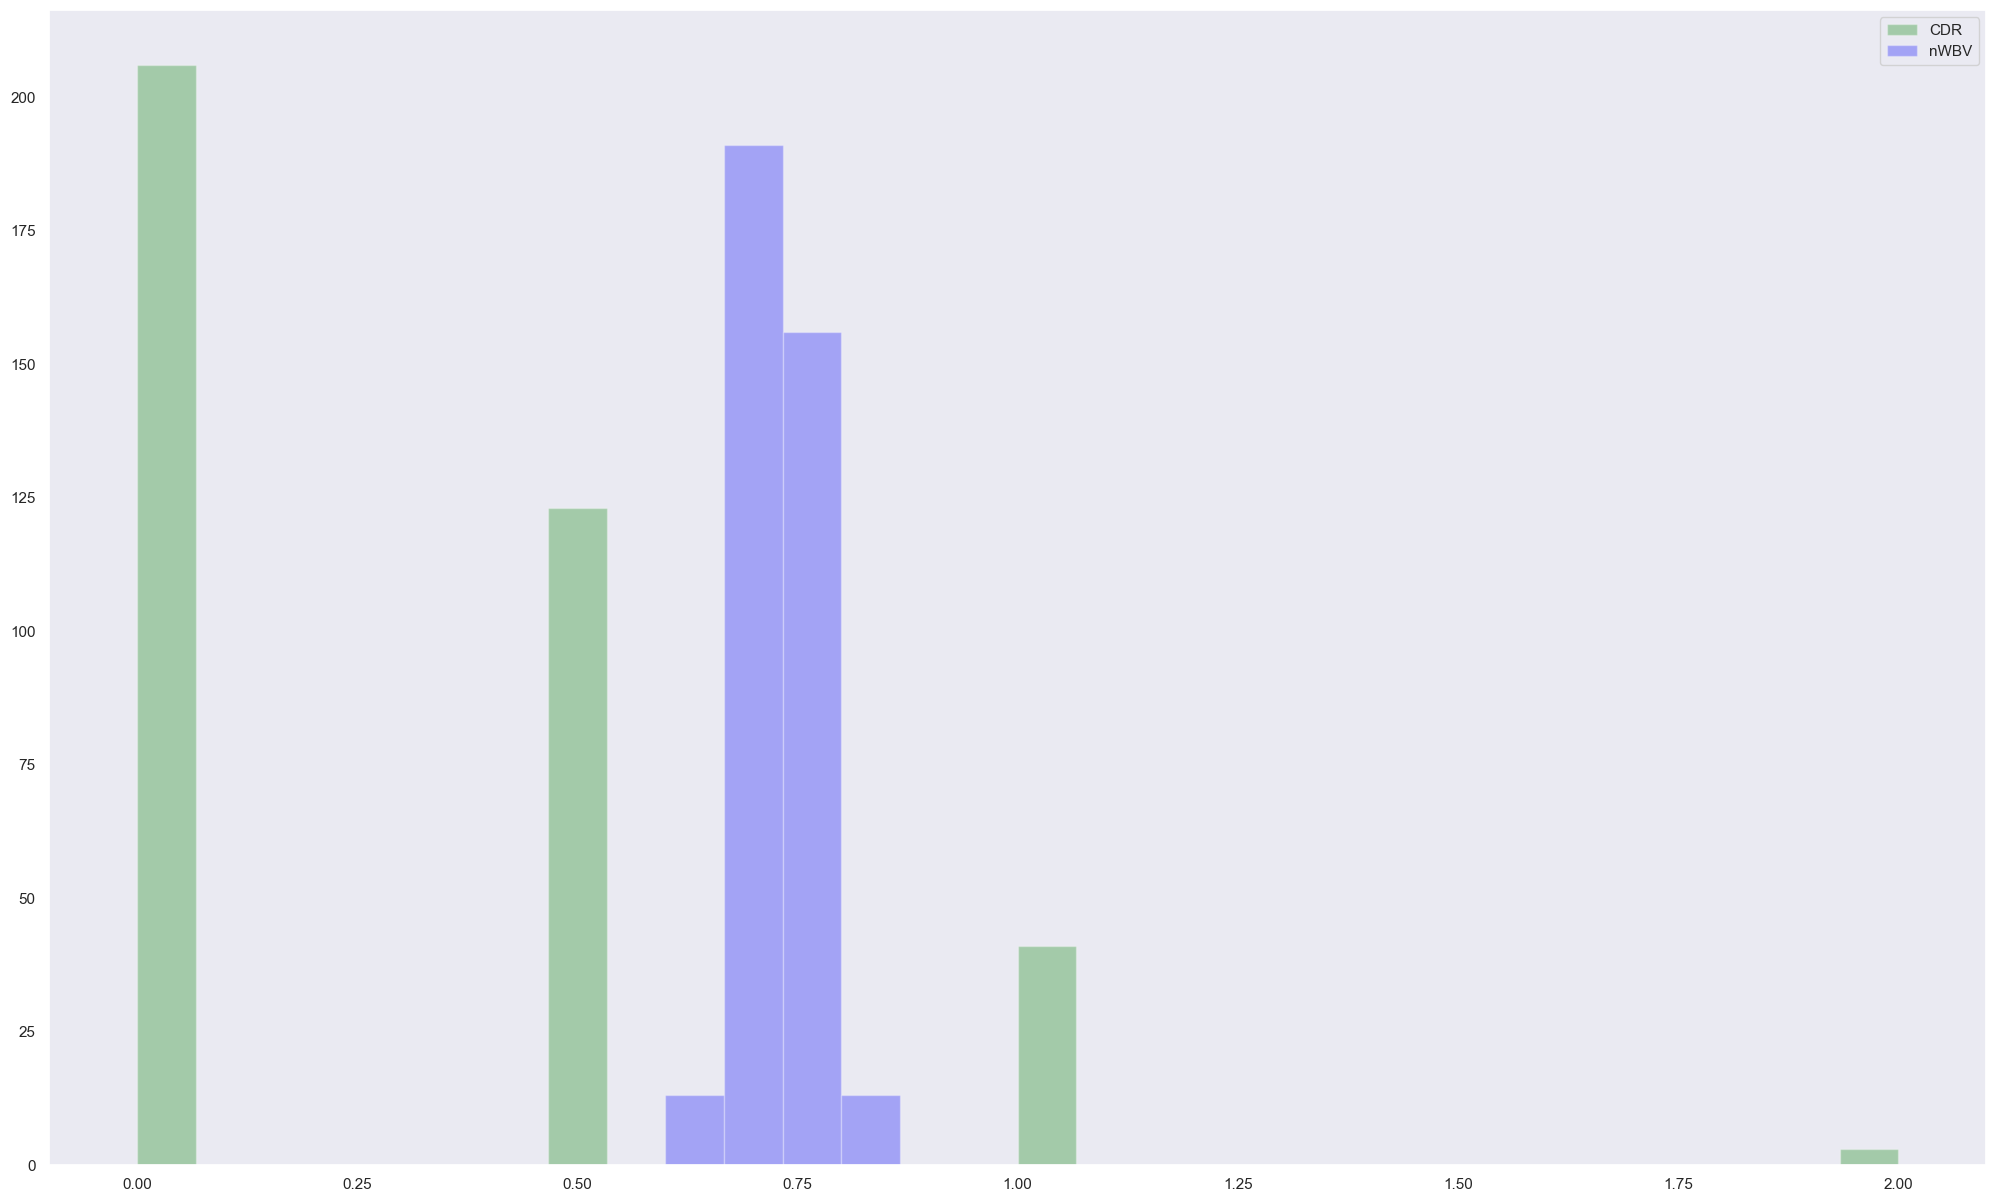

In [20]:
plt.hist(dataset_tmp.CDR, bins=30, range=(0,2), label='CDR', color='green', alpha=0.3)
plt.hist(dataset_tmp.nWBV, bins=30, range=(0,2), label='nWBV', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.grid()
plt.show()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64


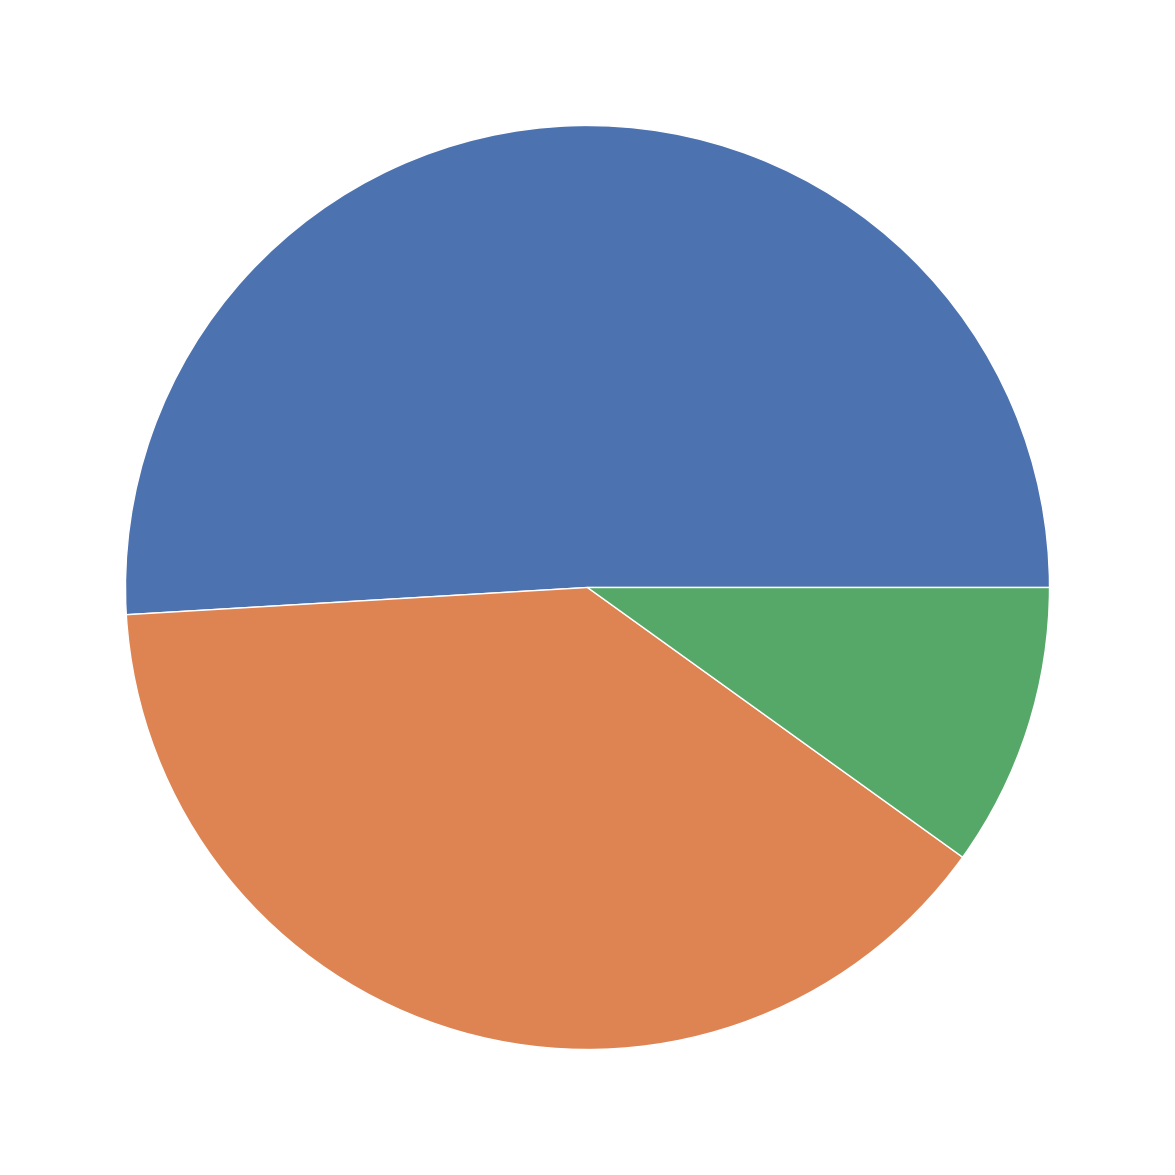

In [29]:
title_name = pd.Series(dataset_tmp['Group']).value_counts()
percent = (title_name/len(dataset_tmp))*100

print(title_name)
plt.pie(percent)
plt.show()

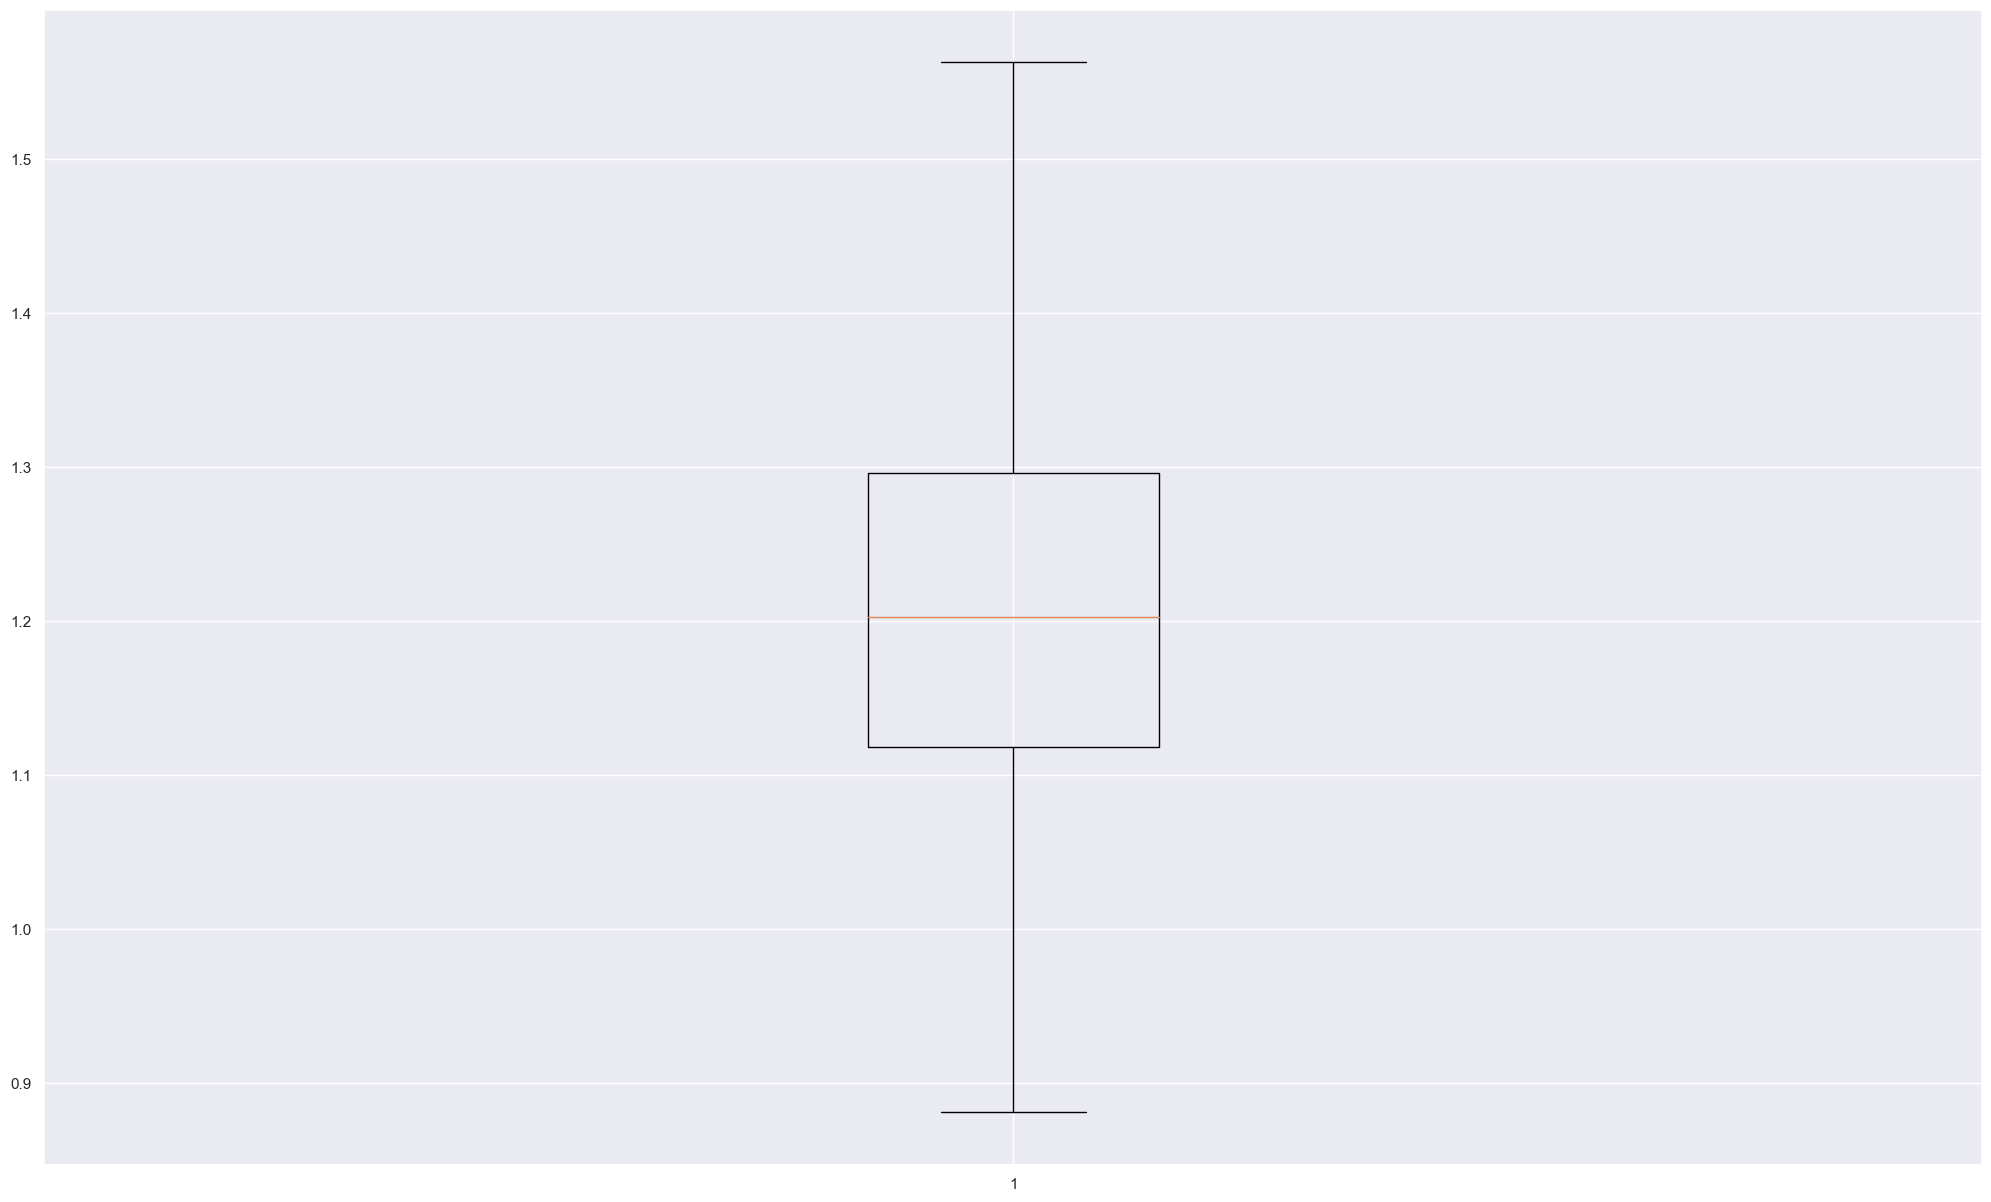

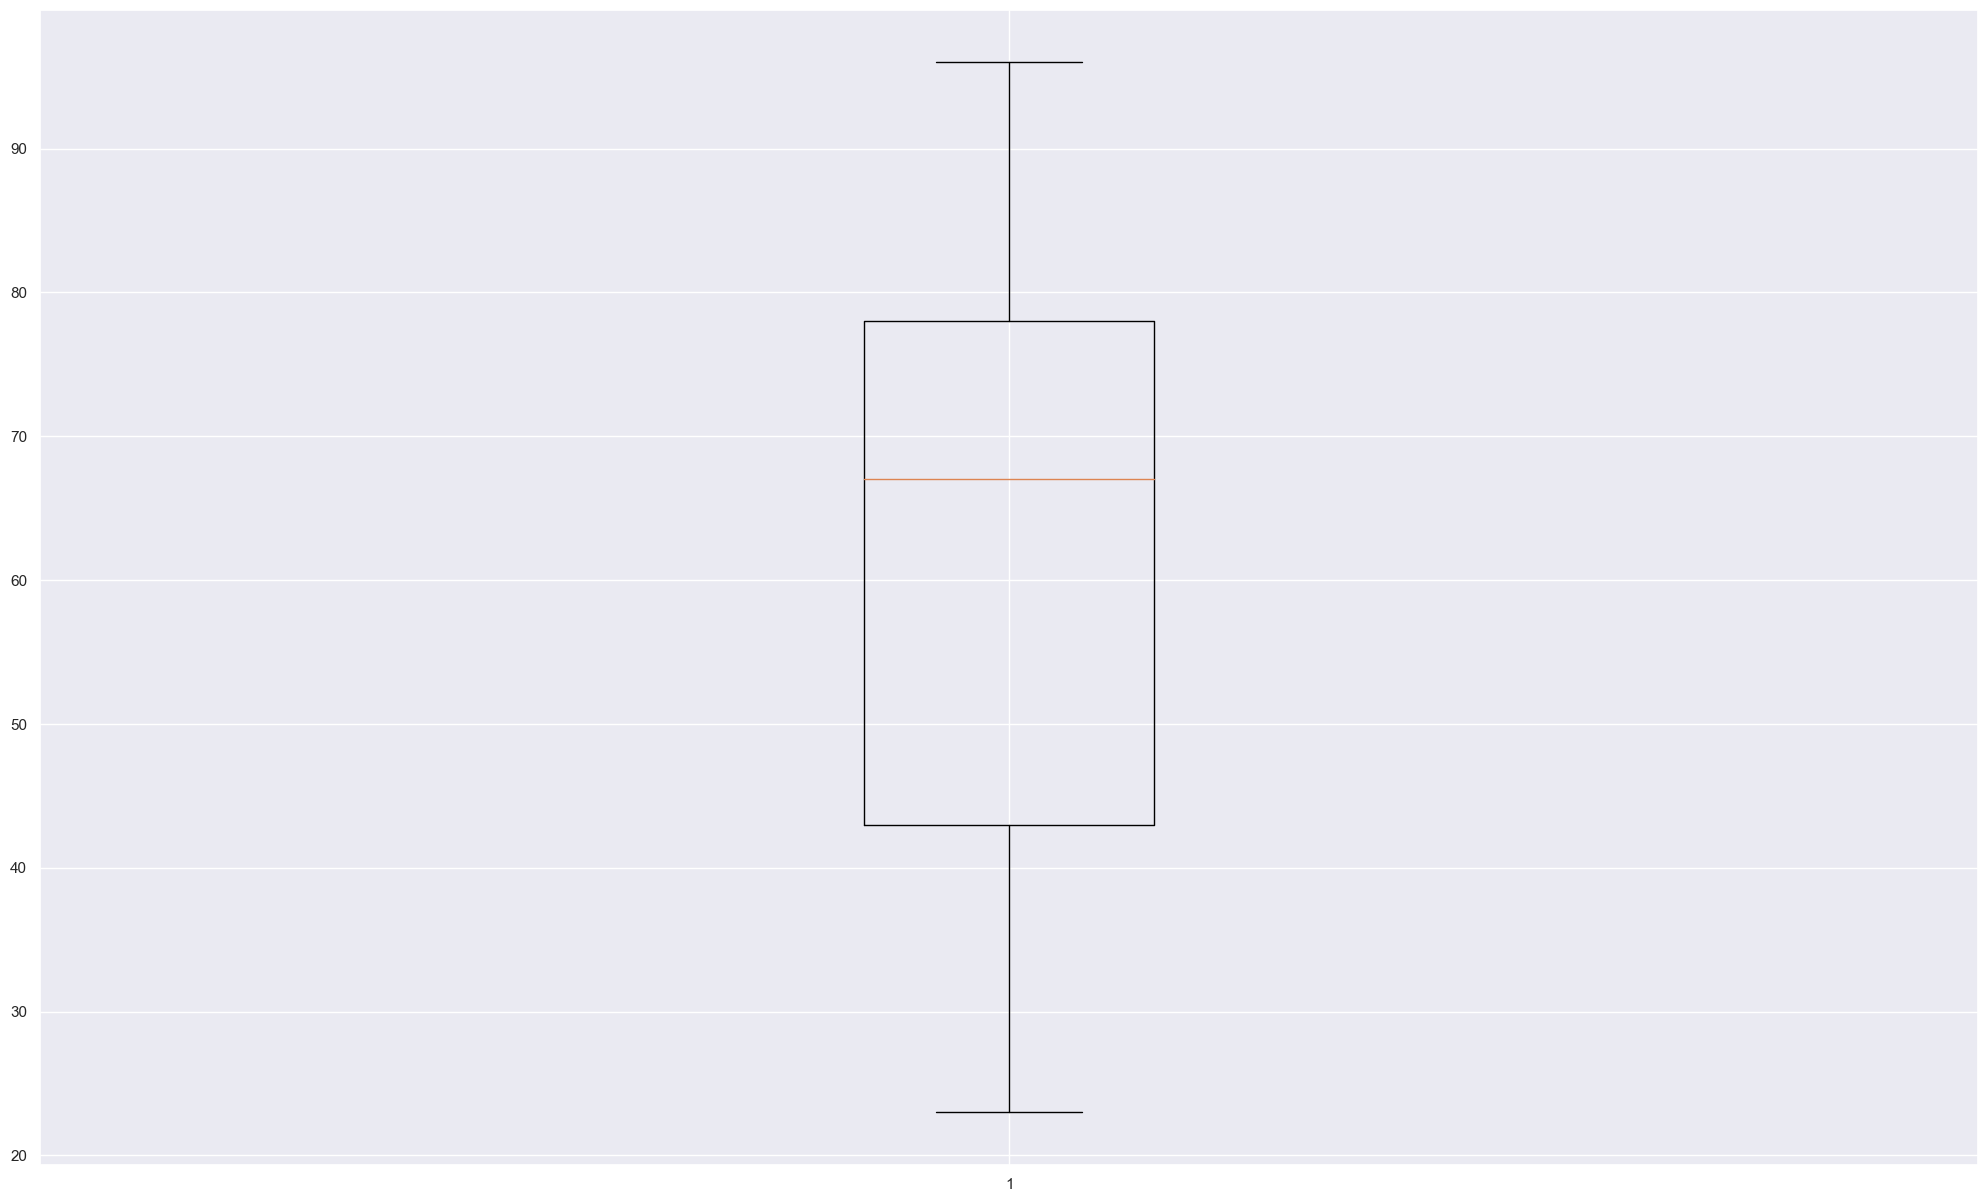

In [28]:
plt.boxplot(dataset_tmp.CDR)
plt.show()
plt.boxplot(dataset_tmp.Age)
plt.show()

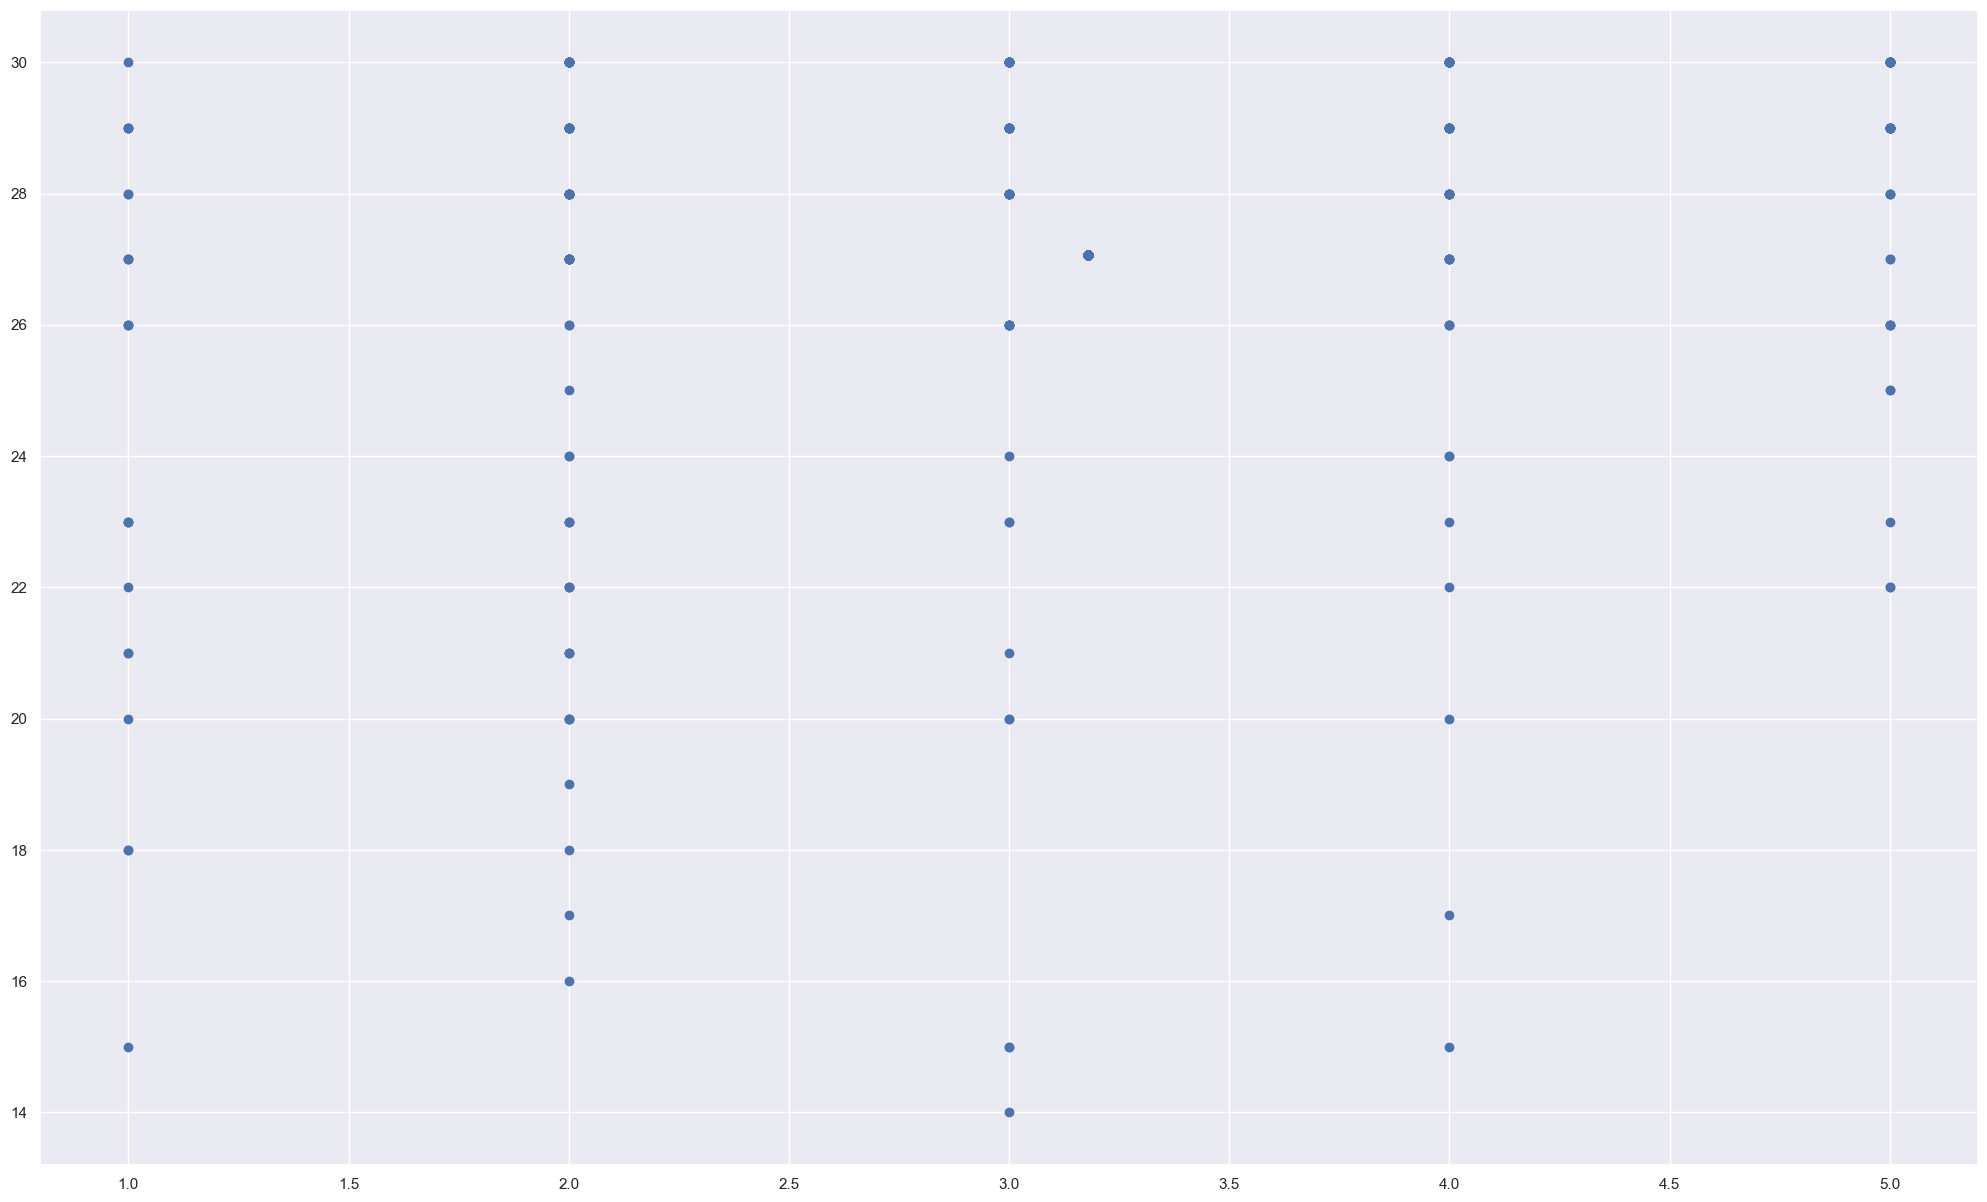

In [29]:
plt.scatter(dataset_tmp.Educ, dataset_tmp.MMSE)
plt.show()

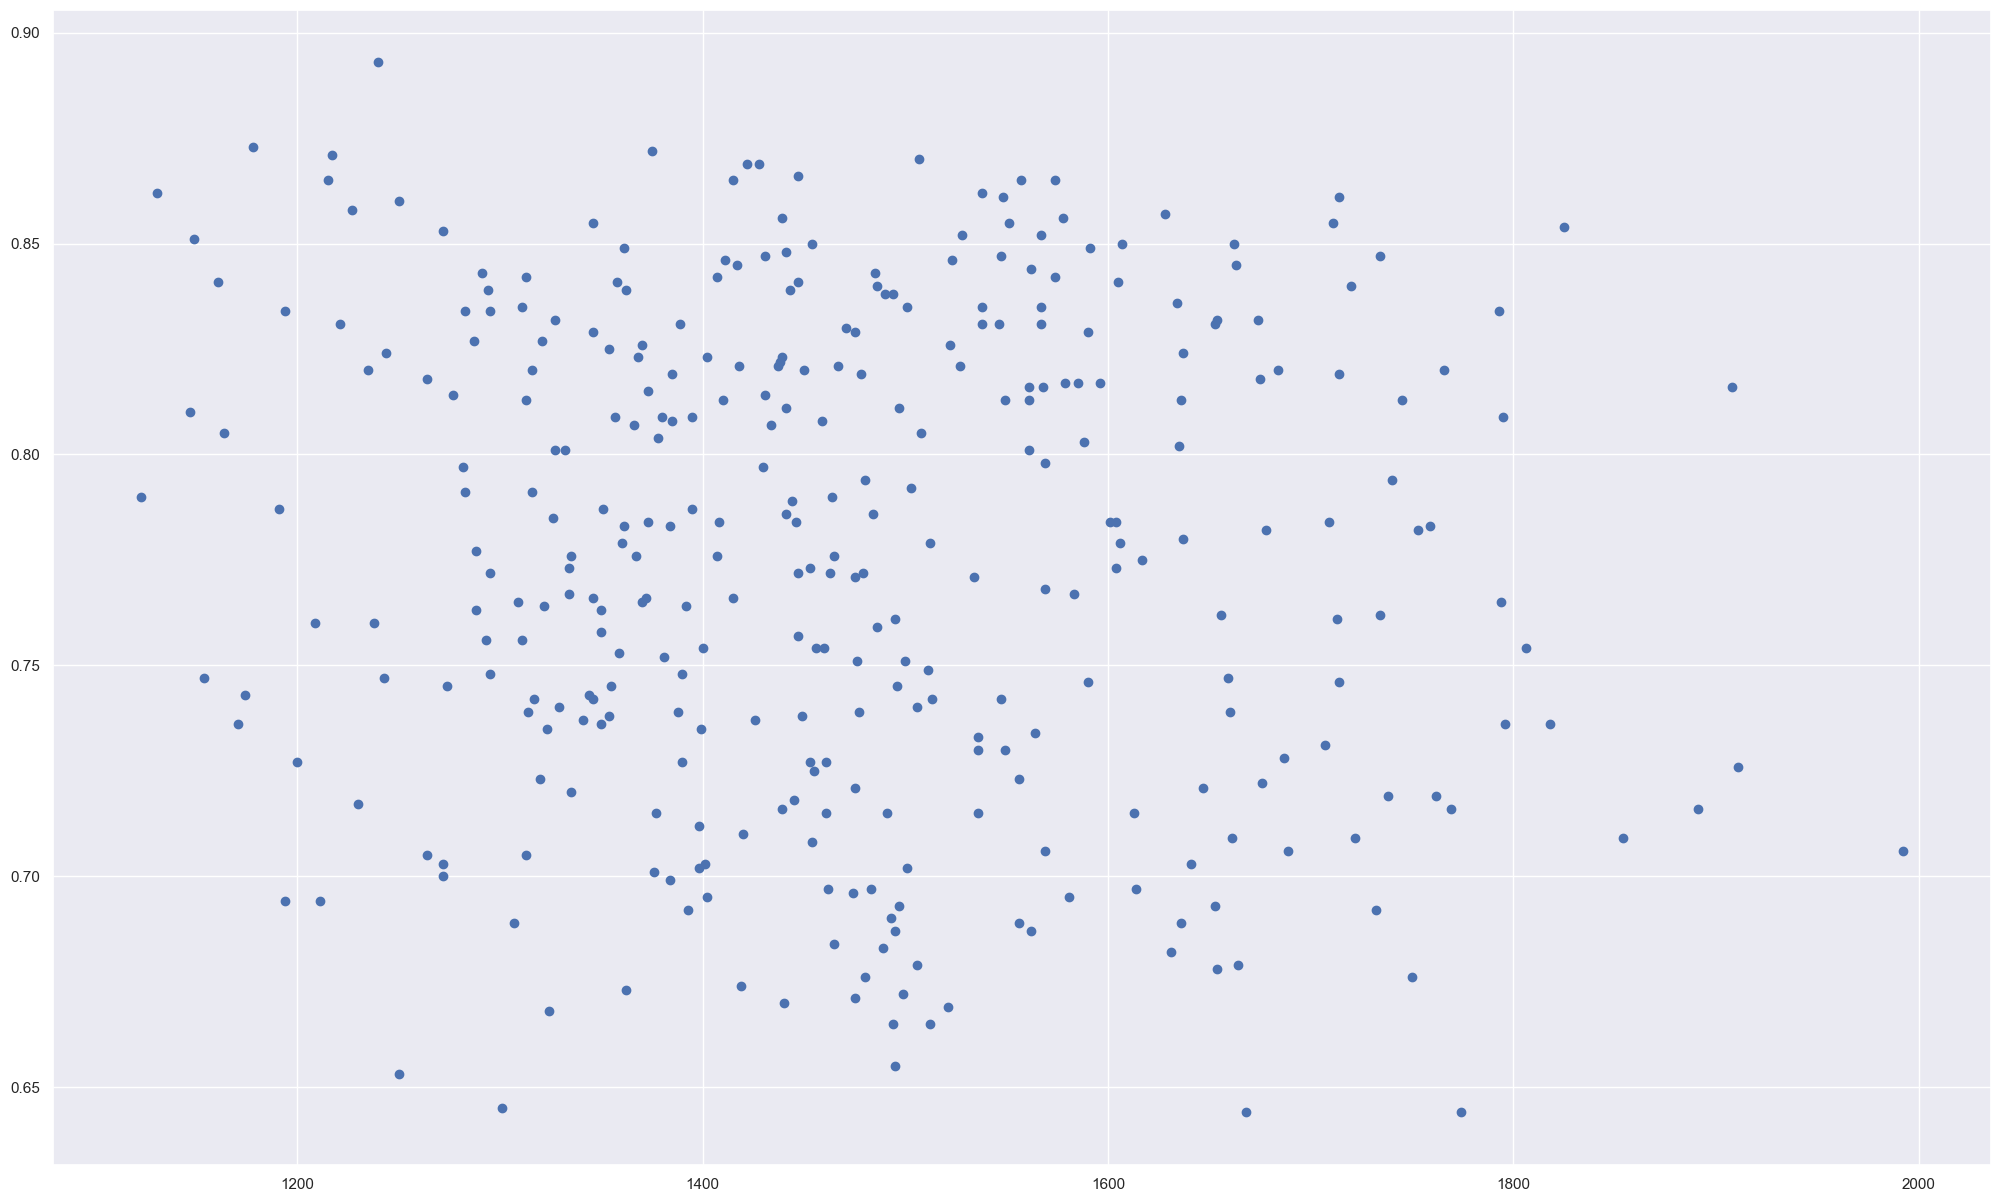

In [30]:
plt.scatter(dataset_tmp.eTIV, dataset_tmp.nWBV)
plt.show()

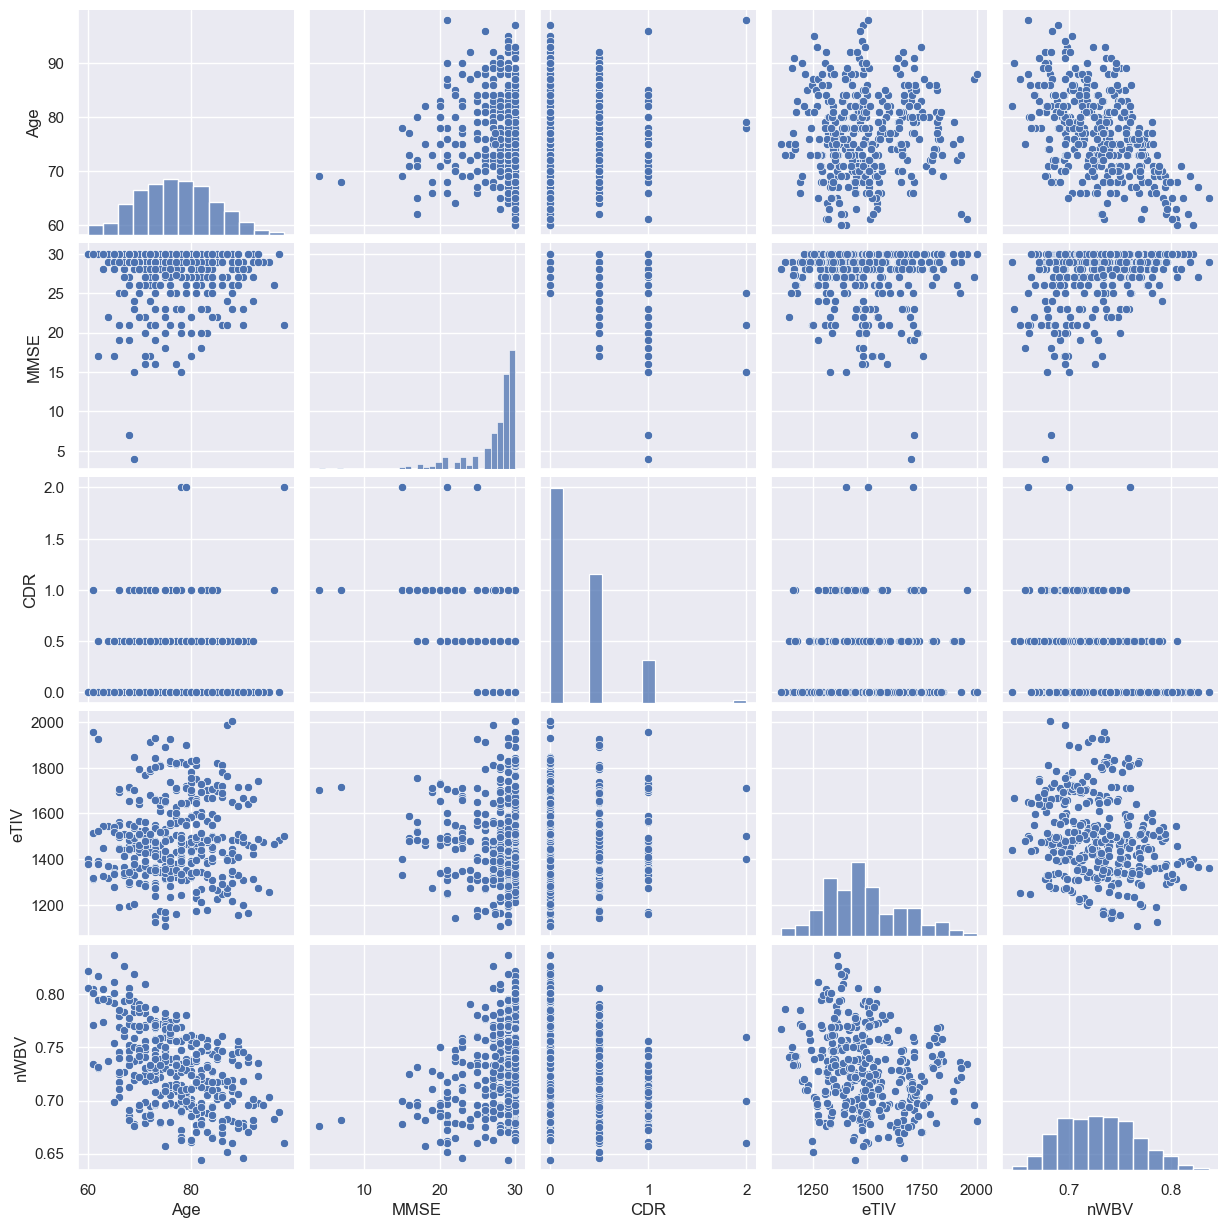

In [7]:
# ID	M/F	Hand	Age	Educ	SES	MMSE	CDR	eTIV	nWBV	ASF	Delay

sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(dataset_tmp.loc[:,['Age', 'MMSE', 'CDR', 'eTIV', 'nWBV']])
plt.show()